<a href="https://colab.research.google.com/github/Samor125678/Test/blob/master/comprehensive_data_exploration_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

<b>'The most difficult thing in life is to know yourself'</b>

Эта цитата принадлежит Фалесу Милетскому. Фалес был греческим / телефонистским философом, математиком и астрономом, который признан первым человеком в западной цивилизации, который, как известно, развлекался и занимался научной мыслью (источник: https://en.wikipedia.org/wiki/Thales)

Я бы не сказал, что знание ваших данных - самая сложная вещь в науке о данных, но это отнимает много времени. Поэтому легко пропустить этот начальный шаг и прыгнуть слишком рано в воду.

Поэтому я попытался научиться плавать, прежде чем прыгать в воду. Основано на [Hair et al. (2013)](https://amzn.to/2JuDmvo), глава «Проверка ваших данных», я приложил все усилия, чтобы провести всесторонний, но не исчерпывающий анализ данных. Я далек от того, чтобы сообщить о тщательном исследовании этого ядра, но я надеюсь, что оно может быть полезным для сообщества, поэтому я делюсь тем, как применил некоторые из этих принципов анализа данных к этой проблеме.

Несмотря на странные имена, которые я дал главам, то, что мы делаем в этом ядре, выглядит примерно так:

1. <b>Understand the problem</b>. Мы рассмотрим каждую переменную и сделаем философский анализ об их значении и важности для этой проблемы.
2. <b>Univariable study</b>. Мы просто сосредоточимся на зависимой переменной («SalePrice») и попытаемся узнать немного больше об этом.
3. <b>Multivariate study</b>. Мы попытаемся понять, как зависимая переменная и независимые переменные связаны.
4. <b>Basic cleaning</b>. Мы очистим набор данных и обработаем недостающие данные, выбросы и категориальные переменные.
5. <b>Test assumptions</b>. Мы проверим, соответствуют ли наши данные предположениям, требуемым большинством многомерных методов.

Пришло время повеселиться!

In [0]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


plt.style.use('dark_background')

In [0]:
#bring in the six packs
df_train = pd.read_csv('./train.csv')

In [0]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* SalePrice - цена продажи имущества в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
* MSSubClass: класс здания
* MSZoning: общая классификация зонирования
* LotFrontage: Линейные ноги улицы, связанные с собственностью
* LotArea: размер лота в квадратных футах
* Street: Тип подъездной дороги
* Alley: Тип доступа к аллее
* LotShape: общая форма собственности
* LandContour: плоскостность недвижимости
* Utilities: Тип доступных утилит
* LotConfig: конфигурация лота
* LandSlope: Склон собственности
* Neighborhood: Физические местоположения в пределах города Эймса
* Condition1: Близость к главной дороге или железной дороге
* Condition2: Близость к главной дороге или железной дороге (если есть секунда)
* BldgType: Тип жилья
* HouseStyle: Стиль жилья
* OverallQual: общий материал и качество отделки
* OverallCond: Общий рейтинг состояния
* YearBuilt: первоначальная дата строительства
* YearRemodAdd: Изменить дату
* RoofStyle: Тип крыши
* RoofMatl: материал крыши
* Exterior1st: Внешнее покрытие дома
* Exterior2nd: Внешнее покрытие дома (если более одного материала)
* MasVnrType: Кирпичный тип шпона
* MasVnrArea: площадь шпона в квадратных футах
* ExterQual: качество наружных материалов
* ExterCond: текущее состояние материала снаружи
* Foundation: Тип основания
* BsmtQual: высота подвала
* BsmtCond: общее состояние подвала
* BsmtExposure: Подвал или подвал на уровне сада
* BsmtFinType1: качество подвального помещения
* BsmtFinSF1: тип 1 готовые квадратные футы
* BsmtFinType2: качество второй готовой области (если есть)
* BsmtFinSF2: Тип 2 готовые квадратные футы
* BsmtUnfSF: Незаконченные квадратные футы подвального помещения
* TotalBsmtSF: Общая площадь подвала
* Heating: Тип отопления
* HeatingQC: качество и состояние отопления
* CentralAir: центральное кондиционирование
* Electrical: Электрическая система
* 1stFlrSF: Первый этаж квадратных футов
* 2ndFlrSF: Второй этаж квадратных футов
* LowQualFinSF: Низкое качество готовых квадратных футов (все этажи)
* GrLivArea: Квадратные футы жилой площади над землей
* BsmtFullBath: Подвал полные ванные комнаты
* BsmtHalfBath: Подвальная половина ванных комнат
* FullBath: полные ванные комнаты выше класса
* HalfBath: половина ванны выше класса
* Bedroom: Количество спален выше уровня подвала
* Kitchen: Количество кухонь
* KitchenQual: качество кухни
* TotRmsAbvGrd: Общее количество комнат выше класса (не включает ванные комнаты)
* Functional: Рейтинг функциональности дома
* Fireplaces: Количество каминов
* FireplaceQu: качество камина
* GarageType: расположение гаража
* GarageYrBlt: Год гараж был построен
* GarageFinish: внутренняя отделка гаража
* GarageCars: размер гаража в вместимости автомобиля
* GarageArea: размер гаража в квадратных футах
* GarageQual: качество гаража
* GarageCond: Состояние гаража
* PavedDrive: асфальтированная дорога
* WoodDeckSF: площадь деревянного настила в квадратных футах
* OpenPorchSF: площадь открытого крыльца в квадратных футах
* EnclosedPorch: площадь закрытого крыльца в квадратных футах
* 3SsnPorch: три сезона крыльцо в квадратных футах
* ScreenPorch: площадь крыльца экрана в квадратных футах
* PoolArea: площадь бассейна в квадратных футах
* PoolQC: качество бассейна
* Fence: качество забора
* MiscFeature: Разная особенность, не включенная в другие категории
* MiscVal:  Значение разных функций
* MoSold: месяц продан
* YrSold: год продан
* SaleType: Тип продажи
* SaleCondition: условия продажи

# 1. Итак ... Что мы можем ожидать?

Чтобы понять наши данные, мы можем посмотреть на каждую переменную и попытаться понять их значение и актуальность для этой проблемы. Я знаю, что это отнимает много времени, но мы познакомимся с нашим набором данных.

Чтобы иметь некоторую структуру в нашем анализе, мы можем создать электронную таблицу Excel со следующими столбцами:
* <b>Variable</b> - имя переменной.
* <b>Type</b> - Идентификация типа переменных. Существует два возможных значения для этого поля: «числовое» или «категориальное». Под «числовыми» мы подразумеваем переменные, для которых значения являются числами, а под «категориальными» мы подразумеваем переменные, для которых значения являются категориями.
* <b>Segment</b> - Идентификация сегмента переменных. Мы можем определить три возможных сегмента: здание, пространство или местоположение. Когда мы говорим «здание», мы имеем в виду переменную, которая относится к физическим характеристикам здания (например, «TotalQual»). Когда мы говорим «пространство», мы имеем в виду переменную, которая сообщает о пространственных свойствах дома (например, «TotalBsmtSF»). Наконец, когда мы говорим «местоположение», мы имеем в виду переменную, которая дает информацию о месте, где находится дом (например, «Neighborhood»).
* <b>Expectation</b> - наше ожидание о влиянии переменной в «SalePrice». Мы можем использовать категориальную шкалу с «Высоким», «Средним» и «Низким» в качестве возможных значений.
* <b>Conclusion</b> - наши выводы о важности переменной после того, как мы кратко рассмотрим данные. Мы можем придерживаться той же категориальной шкалы, что и в «Ожидании».
* <b>Comments</b> - любые общие комментарии, которые произошли с нами.

Хотя «Тип» и «Сегмент» предназначены только для возможного использования в будущем, столбец «Ожидание» важен, потому что он поможет нам развить «шестое чувство». Чтобы заполнить этот столбец, мы должны прочитать описание всех переменных и один за другим спросить себя:

* Думаем ли мы об этой переменной, когда покупаем дом?.
* Если да, насколько важной будет эта переменная? (например, каково влияние «отличного» материала на внешнюю сторону вместо «плохого» и наличия «отличного» вместо «хорошего»?).
* Эта информация уже описана в любой другой переменной? .

После этого непростого упражнения мы можем отфильтровать электронную таблицу и внимательно посмотреть на переменные с «Высоким» «Ожиданием». Затем мы можем поспешно перейти к некоторым точечным графикам между этими переменными и «SalePrice», заполнив столбец «Заключение», который является лишь коррекцией наших ожиданий.

Я прошел этот процесс и пришел к выводу, что следующие переменные могут играть важную роль в этой проблеме:
* OverallQual (это переменная, которая мне не нравится, потому что я не знаю, как она была вычислена; забавным упражнением было бы предсказать 'OverallQual', используя все другие доступные переменные).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

Я закончил с двумя переменными 'building' ('OverallQual' и 'YearBuilt') и двумя переменными 'space' ('TotalBsmtSF' и 'GrLivArea'). Это может быть немного неожиданным, так как это противоречит мантре о недвижимости, которая имеет значение только «местоположение, местоположение и местоположение». Вполне возможно, что этот быстрый процесс исследования данных был немного жестким для категориальных переменных. Например, я ожидал, что переменная Neigborhood будет более релевантной, но после проверки данных я исключил ее. Возможно, это связано с использованием точечных диаграмм вместо коробочных диаграмм, которые больше подходят для визуализации категориальных переменных. То, как мы визуализируем данные, часто влияет на наши выводы.

Однако основной целью этого упражнения было немного подумать о наших данных и ожиданиях, поэтому я думаю, что мы достигли нашей цели. Теперь пришло время «немного меньше разговоров, немного больше действий, пожалуйста». Давайте <b>начнем!</b>

# 2. Перво-наперво: анализ «SalePrice»

«SalePrice» является причиной нашего квеста. Это как когда мы собираемся на вечеринку. У нас всегда есть причина быть там. Обычно женщины - это причина. (отказ от ответственности: адаптируйте его к мужчинам, танцам или алкоголю в соответствии с вашими предпочтениями)

Используя аналогию с женщинами, давайте создадим небольшую историю, историю «Как мы встретили« SalePrice »».

*Все началось с нашей вечеринки в Kaggle, когда мы искали партнера по танцам. Через некоторое время поиски на танцполе мы увидели девушку возле бара, использующую танцевальную обувь. Это признак того, что она там, чтобы танцевать. Мы проводим много времени, занимаясь прогностическим моделированием и участвуя в соревнованиях по аналитике, поэтому общение с девушками не является одной из наших сверхспособностей. Несмотря на это, мы попробовали:*

*«Привет, я Каггли! А вы? 'SalePrice'? Какое прекрасное имя! Вы знаете «SalePrice», не могли бы вы дать мне некоторые данные о вас? Я только что разработал модель для расчета вероятности успешных отношений между двумя людьми. Я хотел бы применить это к нам! '*

In [0]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*«Очень хорошо ... Кажется, ваша минимальная цена больше нуля. Отлично! У тебя нет одной из тех личных черт, которая бы разрушила мою модель! У вас есть какая-нибудь фотография, которую вы можете отправить мне? Я не знаю ... типа, ты на пляже ... или, может быть, селфи в спортзале? '*

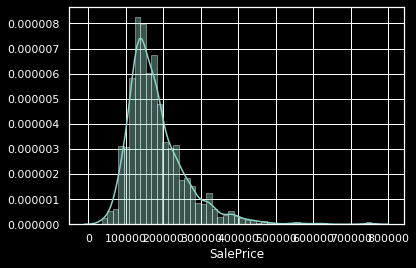

In [0]:

#histogram
sns.distplot(df_train['SalePrice']);

*"Ах! Я вижу, что ты используешь косметику морского бора, когда выходишь на улицу ... Это так элегантно! Я также вижу, что вы:*

* *<b>Отклоняетесь от нормального распределения.</b>*
* *<b>Имеете заметную положительную асимметрию.</b>*
* *<b>Имеетe пик.</b>*

*Это становится интересным! «SalePrice», не могли бы вы дать мне измерения вашего тела? '*

In [0]:
#ассиметрия и эксцесс
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*'Удивительно! Если мой калькулятор любви верен, вероятность нашего успеха составляет 97,834657%. Я думаю, что мы должны встретиться снова! Пожалуйста, оставьте мой номер и позвоните мне, если вы свободны в следующую пятницу. Увидимся через некоторое время, крокодил! '*

# 'SalePrice', ее приятели и ее интересы

*Военная мудрость - выбирать местность, где вы будете сражаться. Как только «SalePrice» ушел, мы перешли на Facebook. Да, сейчас это становится серьезным. Обратите внимание, что это не преследование. Это просто интенсивное исследование личности, если вы понимаете, о чем я.*

*Согласно ее профилю, у нас есть общие друзья. Помимо Чака Норриса, мы оба знаем GrLivArea и TotalBsmtSF. Кроме того, у нас также есть общие интересы, такие как «OverallQual» и «YearBuilt». Это выглядит многообещающе!*

*Чтобы извлечь максимальную пользу из нашего исследования, мы начнем с тщательного изучения профилей наших общих друзей, а затем сосредоточимся на наших общих интересах.*

### Relationship with numerical variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


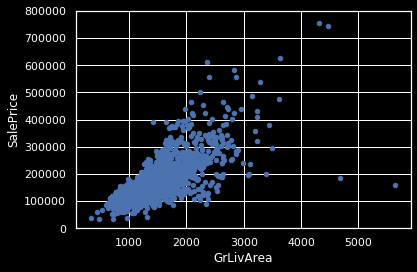

In [0]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*Хммм ... Кажется, что SalePrice и GrLivArea действительно старые друзья с <b>linear relationship.</b>*

*А как насчет TotalBsmtSF?*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


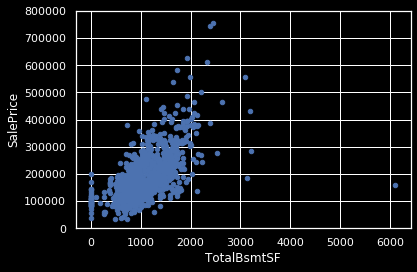

In [0]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*«TotalBsmtSF» также является отличным другом «SalePrice», но это, кажется, гораздо более эмоциональные отношения! Все в порядке, и внезапно, в реакции <b>strong linear (exponential?)</b>, все меняется. Более того, ясно, что иногда TotalBsmtSF закрывается сам по себе и не дает баллов SalePrice.*

### Отношения с категориальными признаками

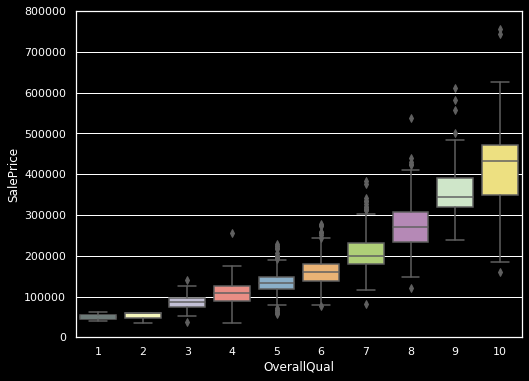

In [0]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*Как и все красивые девушки, «SalePrice» пользуется «OverallQual». Примечание для себя: подумайте, подходит ли McDonald's для первого свидания.*

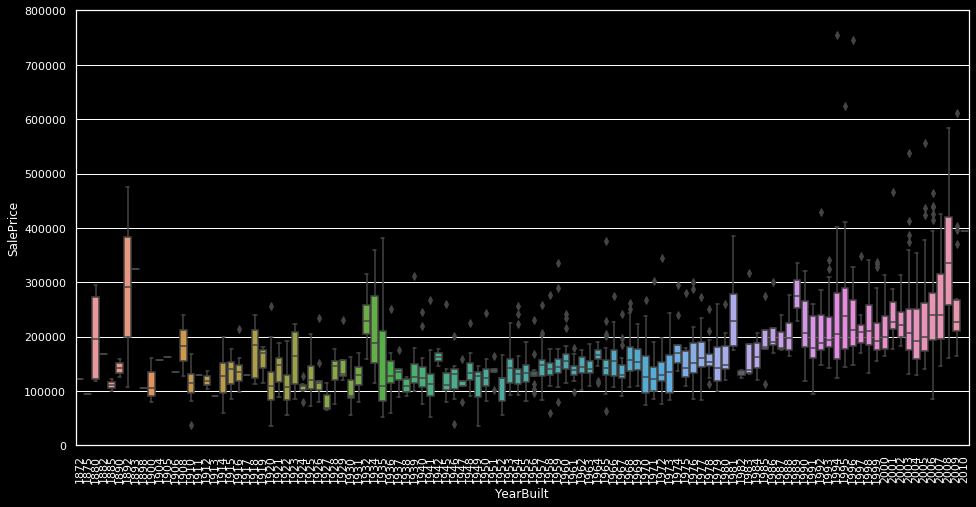

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Хотя это не очень сильная тенденция, я бы сказал, что SalePrice более склонен тратить больше денег на новые вещи, чем на старые реликвии.*

<b>Note</b>: мы не знаем, находится ли SalePrice в постоянных ценах. Постоянные цены пытаются устранить влияние инфляции. Если «SalePrice» не в постоянных ценах, это должно быть так, чтобы цены были сопоставимы за эти годы.

### В итоге

Помимо историй, мы можем сделать вывод, что:

*«GrLivArea» и «TotalBsmtSF» кажутся линейно связанными с «SalePrice». Оба отношения являются положительными, что означает, что с увеличением одной переменной увеличивается и другая. В случае TotalBsmtSF мы видим, что наклон линейных отношений особенно высок.* «OverallQual» и «YearBuilt» также связаны с «SalePrice». Взаимосвязь кажется более сильной в случае «OverallQual», где на рамочном графике показано, как цены продажи увеличиваются с общим качеством.

Мы только что проанализировали четыре переменные, но есть много других, которые мы должны проанализировать. Уловка здесь, кажется, заключается в выборе правильных объектов (выбор объектов), а не в определении сложных отношений между ними (проектирование объектов).

Тем не менее, давайте отделим пшеницу от соломы.

# 3. Сохраняйте спокойствие и работайте умно

До сих пор мы просто следовали нашей интуиции и анализировали переменные, которые считали важными. Несмотря на наши усилия по приданию объективного характера нашему анализу, мы должны сказать, что наша отправная точка была субъективной.

Как инженер, я не чувствую себя комфортно с таким подходом. Все мое образование было о развитии дисциплинированного ума, способного противостоять ветрам субъективности. Есть причина для этого. Попытайтесь быть субъективным в структурном проектировании, и вы увидите, как физика заставляет вещи падать. Это может повредить.

Итак, давайте преодолеем инерцию и сделаем более объективный анализ.

### «Плазменный суп»

«В самом начале не было ничего, кроме плазменного супа. То, что известно об этих коротких моментах времени, в начале нашего изучения космологии, в значительной степени предположительно. Однако наука разработала некоторый набросок того, что, вероятно, произошло, основываясь на том, что известно о вселенной сегодня ». (источник: http://umich.edu/~gs265/bigbang.htm)

Чтобы исследовать вселенную, мы начнем с некоторых практических рецептов, чтобы понять наш «плазменный суп»:
*Корреляционная матрица (стиль тепловых карт).* Корреляционная матрица «SalePrice» (увеличенный стиль тепловой карты).
* Разброс графиков между наиболее коррелированных переменных (двигаться как стиль Джаггера).

#### Матрица корреляции (стиль тепловой карты)

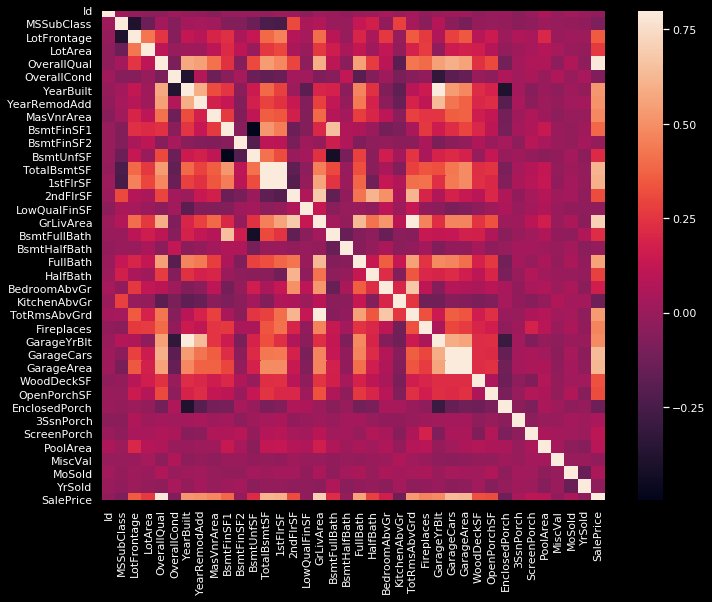

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

На мой взгляд, эта тепловая карта - лучший способ получить краткий обзор нашего «плазменного супа» и его отношений. (Спасибо, @seaborn!)

На первый взгляд, есть два красных квадрата, которые привлекают мое внимание. Первый относится к переменным TotalBsmtSF и 1stFlrSF, а второй относится к переменным GarageX. Оба случая показывают, насколько значима корреляция между этими переменными. На самом деле, эта корреляция настолько сильна, что может указывать на ситуацию мультиколлинеарности. Если мы подумаем об этих переменных, мы можем заключить, что они дают почти одинаковую информацию, так что действительно происходит мультиколлинеарность. Тепловые карты хороши для обнаружения ситуаций такого рода, и в задачах, где доминирует выбор функций, как у нас, они являются важным инструментом.

Еще одна вещь, которая привлекла мое внимание, была корреляция «SalePrice». Мы можем видеть наши хорошо известные «GrLivArea», «TotalBsmtSF» и «OverallQual», говорящие «Привет!», Но мы также можем видеть много других переменных, которые следует учитывать. Это то, что мы будем делать дальше.

#### Матрица корреляции «SalePrice» (увеличенный стиль тепловой карты)

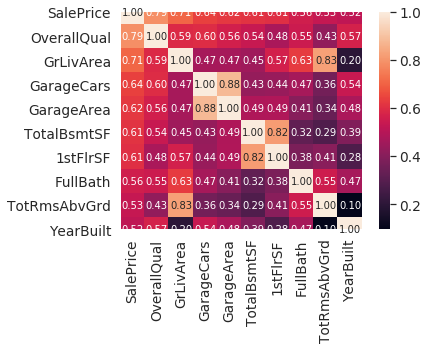

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Согласно нашему хрустальному шару, эти переменные наиболее коррелируют с «SalePrice». Мои мысли по этому поводу:

* «OverallQual», «GrLivArea» и «TotalBsmtSF» тесно связаны с «SalePrice». Проверьте!
* 'GarageCars' и 'GarageArea' также являются одними из наиболее сильно коррелированных переменных. Однако, как мы обсуждали в последнем подпункте, количество автомобилей, которые вписываются в гараж, является следствием площади гаража. «GarageCars» и «GarageArea» похожи на братьев-близнецов. Вы никогда не сможете отличить их. Поэтому нам просто нужна одна из этих переменных в нашем анализе (мы можем сохранить «GarageCars», так как его корреляция с «SalePrice» выше).
* «TotalBsmtSF» и «1stFloor» также кажутся братьями-близнецами. Мы можем оставить «TotalBsmtSF» только для того, чтобы сказать, что наше первое предположение было верным (перечитайте «Итак ... Чего нам ожидать?»).
* FullBath - В самом деле?
* «TotRmsAbvGrd» и «GrLivArea» снова братья-близнецы. Это набор данных из Чернобыля?
* Ах ... 'YearBuilt' ... Кажется, что YearBuilt немного коррелирует с 'SalePrice'. Честно говоря, меня пугает мысль о YearBuilt, потому что я начинаю чувствовать, что мы должны сделать небольшой анализ временных рядов, чтобы сделать это правильно. Я оставлю это как домашнее задание для вас.

Давайте перейдем к точечным графикам.

#### Разброс графиков между 'SalePrice' и коррелированными переменными (перемещается как стиль Джаггера)

Будьте готовы к тому, что вы собираетесь увидеть. Я должен признаться, что когда я впервые увидел эти точечные графики, я был просто поражен! Так много информации в таком коротком пространстве ... Это просто потрясающе. Еще раз спасибо @seaborn! Вы заставляете меня «двигаться как Джаггер»!

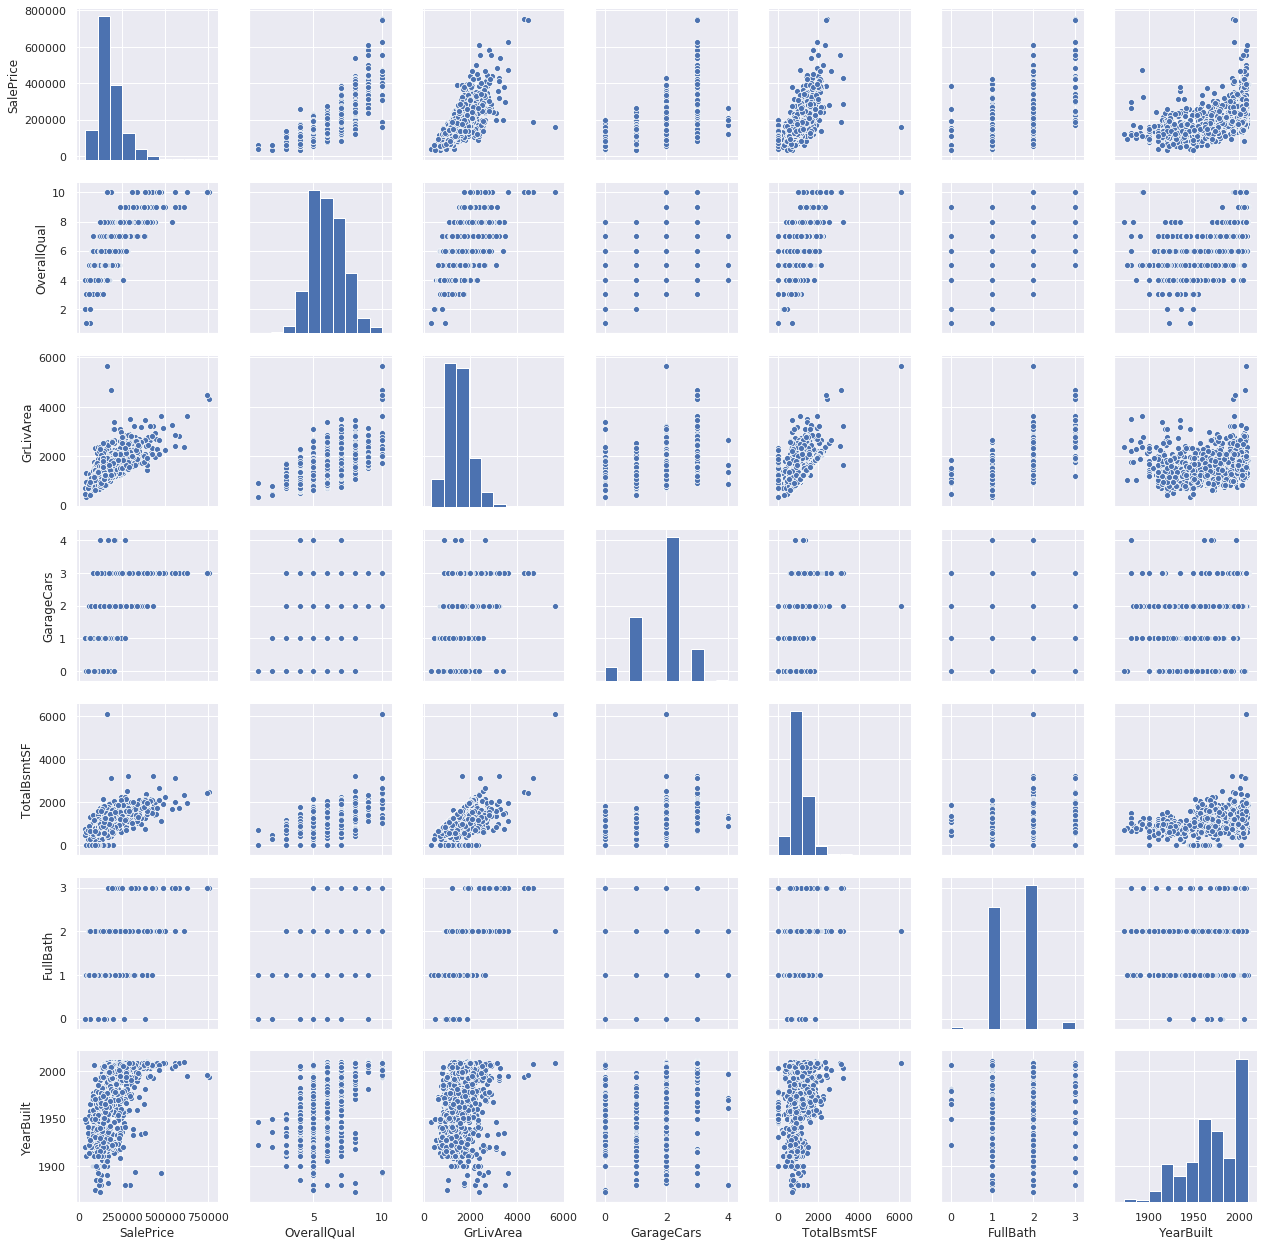

In [0]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Хотя мы уже знаем некоторые из основных фигур, этот мегапиксельный график дает нам разумное представление о связях переменных.

Одна из цифр, которую мы можем найти интересной, - это цифра между «TotalBsmtSF» и «GrLiveArea». На этом рисунке мы видим точки, рисующие линейную линию, которая почти действует как граница. Вполне понятно, что большинство точек остаются ниже этой линии. Подвальные площади могут быть равны надземной жилой площади, но не ожидается, что подвальная площадь будет больше, чем надземной жилой площади (если вы не пытаетесь купить бункер).

Сюжет о «SalePrice» и «YearBuilt» также может заставить нас задуматься. В нижней части «облака точек» мы видим то, что почти кажется застенчивой экспоненциальной функцией (будьте изобретательны). Мы также можем видеть эту тенденцию в верхней границе «облака точек» (будьте еще более креативными). Также обратите внимание на то, как множество точек за последние годы имеют тенденцию оставаться выше этого предела (я просто хотел сказать, что цены растут быстрее).

Хорошо, достаточно теста Роршаха. Давайте двигаться вперед к тому, чего не хватает: недостающие данные!

# 4. Отсутствующие данные

Важные вопросы, когда вы думаете об отсутствующих данных:

*Насколько распространены отсутствующие данные?* Случайно пропущенные данные или шаблон?

Ответ на эти вопросы важен по практическим причинам, потому что отсутствие данных может означать уменьшение размера выборки. Это может помешать нам продолжить анализ. Более того, с точки зрения существа, мы должны обеспечить, чтобы процесс недостающих данных не был предвзятым и не скрывал неудобную правду.

In [0]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Давайте проанализируем это, чтобы понять, как обрабатывать недостающие данные.

Мы учтем, что, когда более 15% данных отсутствуют, мы должны удалить соответствующую переменную и сделать вид, что ее никогда не было. Это означает, что в этих случаях мы не будем пытаться уловить любые недостающие данные. В соответствии с этим существует набор переменных (например, «PoolQC», «MiscFeature», «Alley» и т. Д.), Которые мы должны удалить. Дело в том: будем ли мы пропустить эти данные? Я так не думаю. Ни одна из этих переменных, кажется, не очень важна, так как большинство из них не являются аспектами, о которых мы думаем при покупке дома (может быть, это причина, по которой отсутствуют данные?). Более того, если присмотреться к переменным, можно сказать, что такие переменные, как «PoolQC», «MiscFeature» и «FireplaceQu», являются сильными кандидатами на выбросы, поэтому мы будем рады их удалить.

Что касается остальных случаев, мы видим, что переменные 'Garage *X*' содержат одинаковое количество пропущенных данных. Бьюсь об заклад, пропущенные данные относятся к тому же набору наблюдений (хотя я не буду проверять это; это всего лишь 5%, и мы не должны тратить 20$ in 5$ проблемы). Поскольку наиболее важная информация о гаражах выражается в «GarageCars» и, учитывая, что мы говорим о 5% недостающих данных, я удалю упомянутые переменные «Garage *X*». Та же логика применима к переменным 'Bsmt *X*'.

Что касается MasVnrArea и MasVnrType, мы можем считать, что эти переменные несущественны. Кроме того, они имеют сильную корреляцию с «YearBuilt» и «GeneralQual», которые уже рассматриваются. Таким образом, мы не потеряем информацию, если удалим «MasVnrArea» и «MasVnrType».

Наконец, у нас есть одно отсутствующее наблюдение в «Электротехнике». Поскольку это всего лишь одно наблюдение, мы удалим это наблюдение и сохраним переменную.

Таким образом, для обработки отсутствующих данных мы удалим все переменные с отсутствующими данными, кроме переменной «Электрические». В «Электротехнике» мы просто удалим наблюдение с отсутствующими данными.

In [0]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liars!

Выбросы - это тоже то, о чем мы должны знать. Почему? Потому что выбросы могут заметно повлиять на наши модели и могут стать ценным источником информации, предоставляя нам представление о конкретном поведении.

Выбросы - сложная тема, и она заслуживает большего внимания. Здесь мы просто проведем быстрый анализ через стандартное отклонение «SalePrice» и набор точечных диаграмм.

### Одномерный анализ

Основной задачей здесь является установление порога, который определяет наблюдение как выброс. Для этого мы стандартизируем данные. В этом контексте стандартизация данных означает преобразование значений данных в среднее значение 0 и стандартное отклонение 1.

In [0]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Как «SalePrice» выглядит со своей новой одеждой:

* Низкие значения диапазона похожи и не слишком далеки от 0.
* Значения верхнего диапазона далеки от 0, а значения 7.что-то действительно находятся за пределами диапазона.

Пока мы не будем рассматривать какие-либо из этих значений как выбросы, но мы должны быть осторожны с этими двумя значениями 7.что-то.

### Двумерный анализ

Мы уже знаем следующие графики разброса наизусть. Однако, когда мы смотрим на вещи с новой точки зрения, всегда есть что открыть. Как сказал Алан Кей, «изменение перспективы стоит 80 IQ баллов».

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


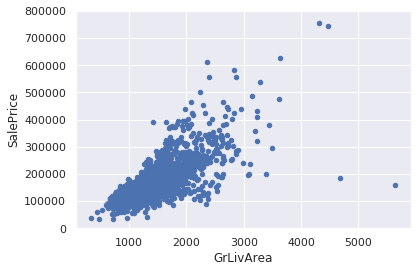

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Что было обнаружено:

* Два значения с большей GrLivArea кажутся странными, и они не следуют за толпой. Мы можем предположить, почему это происходит. Может быть, они относятся к сельскохозяйственной области, и это может объяснить низкую цену. Я не уверен в этом, но я совершенно уверен, что эти два пункта не являются типичными для типичного случая. Поэтому мы определим их как выбросы и удалим их.
* Два наблюдения в верхней части графика - это те наблюдения, о которых мы сказали, что должны быть осторожны. Они выглядят как два особых случая, однако, похоже, следуют тренду. По этой причине мы будем держать их.

In [0]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


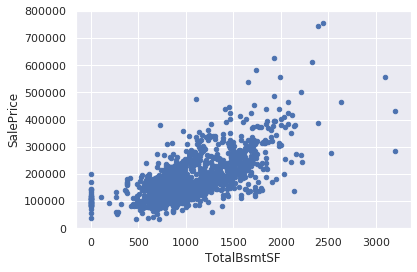

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Мы можем испытывать искушение исключить некоторые наблюдения (например, TotalBsmtSF> 3000), но я полагаю, это того не стоит. Мы можем жить с этим, поэтому мы ничего не будем делать.

# 5. Получение жесткого ядра

В романе Айн Рэнд «Атлант расправил плечи» часто повторяется вопрос: кто такой Джон Галт? Большая часть книги посвящена поиску ответа на этот вопрос.

Теперь я чувствую Рэндиана. Кто такой «SalePrice»?

Ответ на этот вопрос заключается в проверке допущений, лежащих в основе статистических основ многомерного анализа. Мы уже провели некоторую очистку данных и многое узнали о «SalePrice». Теперь пришло время углубиться и понять, как SalePrice соответствует статистическим допущениям, которые позволяют нам применять многовариантные методы.

Согласно [Hair et al. (2013)](https://amzn.to/2uC3j9p), должны быть проверены четыре предположения:

* <b>Normality</b> - когда мы говорим о нормальности, мы имеем в виду, что данные должны выглядеть как нормальное распределение. Это важно, потому что несколько статистических тестов полагаются на это (например, t-статистика). В этом упражнении мы просто проверим одномерную нормальность для «SalePrice» (это ограниченный подход). Помните, что одномерная нормальность не обеспечивает многомерную нормальность (что мы и хотели бы иметь), но она помогает. Другая деталь, которую следует принять во внимание, заключается в том, что в больших выборках (> 200 наблюдений) нормальность не является такой проблемой. Однако, если мы решаем нормальность, мы избегаем многих других проблем (например, гетероразмерности), поэтому это основная причина, по которой мы проводим этот анализ.
* <b>Homoscedasticity</b> - надеюсь, я все правильно написал. Под гомоскедастичностью понимается «предположение о том, что зависимая переменная (и) демонстрирует одинаковый уровень дисперсии во всем диапазоне переменной (ей) предиктора» [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Гомоскедастичность желательна, потому что мы хотим, чтобы член ошибки был одинаковым для всех значений независимых переменных.
* <b>Linearity</b>. Наиболее распространенный способ оценки линейности - это изучение графиков рассеяния и поиск линейных структур. Если шаблоны не являются линейными, было бы целесообразно изучить преобразования данных. Тем не менее, мы не будем вдаваться в это, потому что большинство рассеянных графиков, которые мы видели, имеют линейные зависимости.

Как вы думаете, что Элвис скажет об этом длинном объяснении? «Немного меньше разговоров, немного больше действий, пожалуйста»? Возможно ... Кстати, ты знаешь, какой был последний великий хит Элвиса?

(...)

В ванной комнате пол.

### В поисках нормальности

Суть в том, чтобы протестировать «SalePrice» очень скудным способом. Мы сделаем это, обращая внимание на:

* <b>Histogram</b> - Эксцесс и асимметрия.
* <b>Normal probability plot</b> - Распределение данных должно следовать диагонали, которая представляет нормальное распределение.

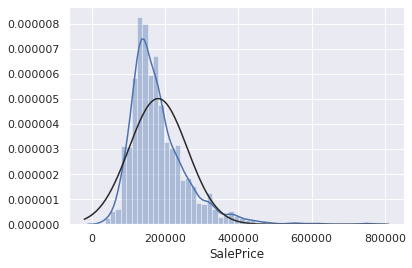

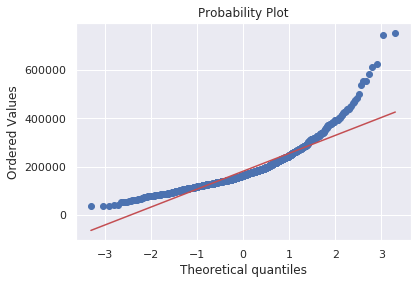

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Хорошо, «SalePrice» не нормальна. Она показывает «пик», положительную асимметрию и не следует диагональной линии.

Но не все потеряно. Простое log преобразование данных может решить проблему. Это одна из замечательных вещей, которую вы можете изучить в статистических книгах: в случае положительной асимметрии преобразования log обычно работают хорошо. Когда я обнаружил это, я почувствовал себя студентом Хогвартса, открывающим новое крутое заклинание.

*Авада Кедавра!*

In [0]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

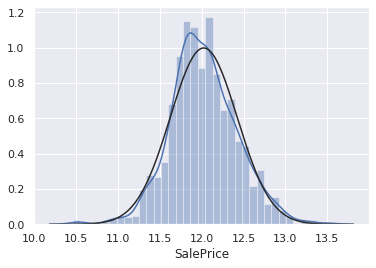

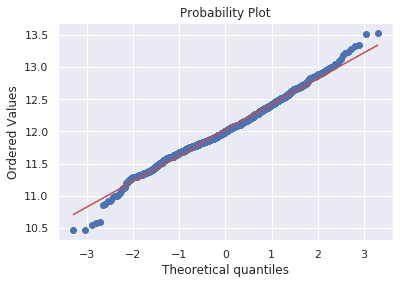

In [0]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Готово! Давайте посмотрим, что происходит с GrLivArea.

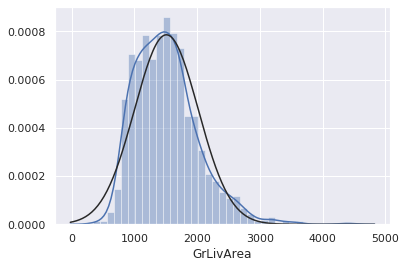

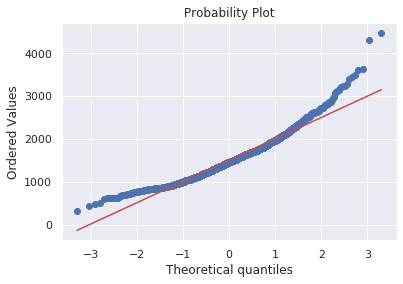

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

На вкус как асимметрия ... *Авада кедавра!*

In [0]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

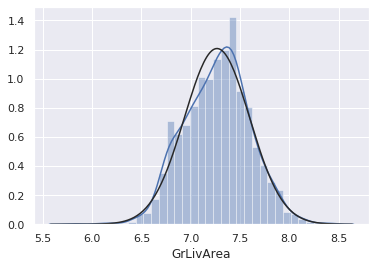

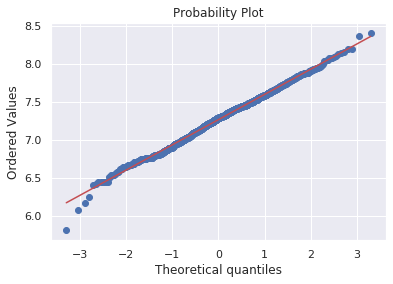

In [0]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Следующий, пожалуйста...

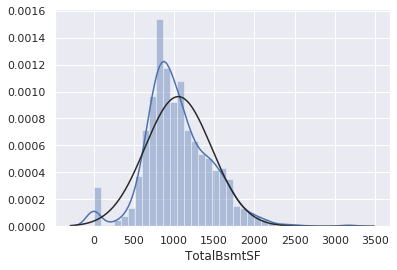

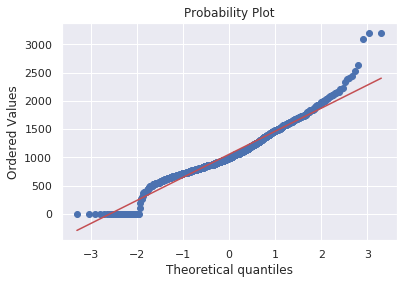

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Хорошо, теперь мы имеем дело с большим боссом. Что же мы имеем здесь?

* Что-то, что в целом представляет асимметрию.
* Значительное количество наблюдений с нулевым значением (дома без фундамента).
* Большая проблема, потому что нулевое значение не позволяет нам делать преобразования.

Чтобы применить преобразование здесь, мы создадим переменную, которая может получить эффект наличия или отсутствия основания (двоичная переменная). Затем мы сделаем преобразование для всех ненулевых наблюдений, игнорируя те, которые имеют нулевое значение. Таким образом, мы можем преобразовывать данные, не теряя эффекта наличия или отсутствия фундамента.

Я не уверен, что этот подход правильный. Мне это показалось правильным. Это то, что я называю «инжинирингом высокого риска».

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

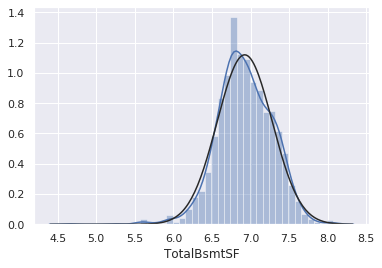

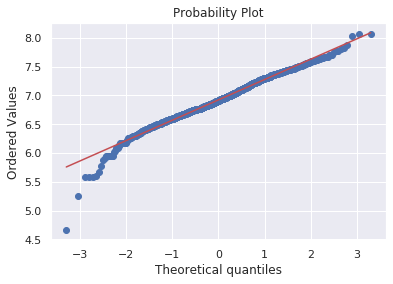

In [0]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### В поисках написания слова "гомоскедастичность" с первой попытки

Наилучшим подходом для проверки гомоскедастичности двух метрических переменных является графический метод. Отклонения от равной дисперсии показаны такими формами, как конусы (малая дисперсия на одной стороне графика, большая дисперсия на противоположной стороне) или ромбы (большое количество точек в центре распределения).

Начиная с «SalePrice» и «GrLivArea» ...

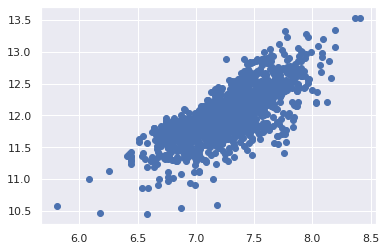

In [0]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Более ранние версии этого точечного графика (до преобразования журнала) имели коническую форму (вернитесь и проверьте «Диаграммы разброса между« SalePrice »и коррелированными переменными (двигайтесь как стиль Джаггера)»). Как видите, текущий график рассеяния больше не имеет конической формы. Это сила нормальности! Просто обеспечив нормальность некоторых переменных, мы решили проблему гомоскедастичности.

Теперь давайте проверим «SalePrice» с помощью «TotalBsmtSF».

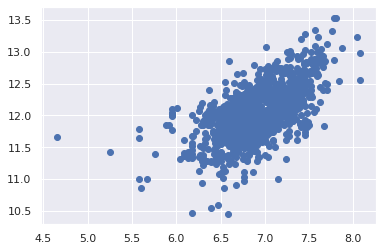

In [0]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

Можно сказать, что в целом «SalePrice» демонстрирует одинаковые уровни дисперсии в диапазоне «TotalBsmtSF». Здорово!

# Last but not the least, dummy variables

# Не в последнюю очередь, фиктивные переменные

Easy mode.

Легкий режим.

In [0]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,6.752270,856,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,7.140453,1262,0,0,7.140453,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,6.824374,920,866,0,7.487734,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,6.628041,961,756,0,7.448334,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,7.043160,1145,1053,0,7.695303,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Заключение

Это оно! Мы достигли конца нашего упражнения.

В этом ядре мы применяем на практике многие из стратегий, предложенных [Hair et al. (2013)] (https://amzn.to/2uC3j9p). Мы философствовали о переменных, мы анализировали только «SalePrice» и с наиболее коррелированными переменными, мы имели дело с отсутствующими данными и выбросами, мы проверяли некоторые фундаментальные статистические допущения и даже преобразовывали категориальные переменные в фиктивные переменные. Это большая работа, которую Python помог нам сделать проще.

Но квест еще не закончен. Помните, что наша история остановилась в исследовании Facebook. Теперь пришло время позвонить «SalePrice» и пригласить ее на ужин. Попробуйте предсказать ее поведение. Как вы думаете, она девушка, которая любит регуляризованные подходы линейной регрессии? Или ты думаешь она предпочитает ансамблевые методы? Или может быть что-то еще?

Это зависит от вас, чтобы узнать.